<a href="https://colab.research.google.com/github/piyush02nir/World_Bank_Global_Education/blob/main/Piyush_Nirwan_World_Bank_Global_Education_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>


#**In this project we are going to analyze the World Bank EdStats Data in order to find out valuable insights.**

#**The following Indicators have been chosen for analysis:-**

##Economy:-

*  GDP at market prices (current US$)	NY.GDP.MKTP.CD

*  GDP per capita (current US$)	NY.GDP.PCAP.CD

##Early Childhood Education:-

*  Pupil-teacher ratio in primary education (headcount basis)	SE.PRM.ENRL.TC.ZS

##Expenditures:-

*  Government expenditure on education as % of GDP (%) - SE.XPD.TOTL.GD.ZS

##Population:-

*  Population growth (annual %)  SP.POP.GROW
Mortality rate, under-5 (per 1,000)	SH.DYN.MORT

##Unemployment Data:-

*  Unemployment, total (% of total labor force)	SL.UEM.TOTL.ZS

##Learning Outcomes:-

*  PISA: Mean performance on the Reading scale (number) - LO.PISA.REA

*  PISA: Mean performance on the Mathematics scale (number) - LO.PISA.MAT

#Importing Necessary Modules and Libraries

We are importing following libraries for their respective applications:

* Pandas:- Pandas is used to analyze data. It has functions for analyzing, cleaning, exploring, and manipulating data.

* Matplotlib:- Matplotlib is a graph plotting library in python that serves as a visualization utility. Most of the Matplotlib utilities lies under the pyplot submodule.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Loading and Discovering Data**


---


Now, we need to load our data from the external source, which in this case is uploaded to the drive. Also we would try to spot the nature and properties of the data that we have. The data is divided into 5 different CSV files, each containing the information as follows:

**1.EdStatsData**:- This file contains Education Statistics data (from ear 1970 to 2100) of all the countries that are World Bank members and this data is dependent on various indicators that resembles various factors that affect the overall Education growth and development of the country. These indicators can be access, availabilty, teachers, expenditures, population, lieracy, assessments etc.

**2.EdStatsCountry**:- This file contains information from census and surveys across various departments, segregated in a country-wise manner

**3.EdStatsCountry-Series**:- This file contains the Series Code for various indicators, as well as the Data sources from which they have been derived

**4.EdStatsFootNote**:- This file contains year wise indicator names along with their respective descrption. It tells us the nature of the indicators, if its and estimate value or a percentage distribution etc. From context of our analysis this information isn't quite useful, since its already evident with the type of data EdStatsData holds.

**5.EdStatsSeries**:- This file contains regional learning assessments data(e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data.

In [5]:
# paths to all the files used in this analysis
path1=('/content/drive/MyDrive/Capston_project_World_bank_Global_Education/data sets/EdStatsCountry-Series.csv')
path2=('/content/drive/MyDrive/Capston_project_World_bank_Global_Education/data sets/EdStatsCountry.csv')
path3=('/content/drive/MyDrive/Capston_project_World_bank_Global_Education/data sets/EdStatsData.csv')
path4=('/content/drive/MyDrive/Capston_project_World_bank_Global_Education/data sets/EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/Capston_project_World_bank_Global_Education/data sets/EdStatsSeries.csv')

In [6]:
# reading all the csv files
Ed_stats_data_df = pd.read_csv(path1)
country_df=pd.read_csv(path2)
main_data=pd.read_csv(path3)
new_data=pd.read_csv(path3)
Ed_stats_footnote_df = pd.read_csv(path4)
Ed_stats_series_df = pd.read_csv(path5) 

***Getting overview of data***

In [7]:
# getting all the column names
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [8]:
# Droppe null value  columns
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)


In [9]:
# droping country code
main_data.drop(['Country Code'],axis=1,inplace=True)

In [10]:
# setting index
main_data.set_index(['Country Name'],inplace=True)

In [11]:
# creating data frame based on income group
Income_df=main_data.loc[['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income']]

In [12]:
# creating data frame based on region
Region_df=main_data.loc[['World','OECD members','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America', 'Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

GDP Data and GDP per capita

In [13]:
# selectiong the indicator to do analysis on for this graph
GDP_current_df = Region_df[Region_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_per_capita_df = Region_df[Region_df['Indicator Code']=='NY.GDP.PCAP.CD']
GDP_2005_df = Region_df[Region_df['Indicator Code']=='NY.GDP.MKTP.KD']
GDP_per_capita_2005_df = Region_df[Region_df['Indicator Code']=='NY.GDP.PCAP.KD']

In [14]:
# droing indicator name column
GDP_current_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
GDP_per_capita_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
GDP_2005_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)
GDP_per_capita_2005_df.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


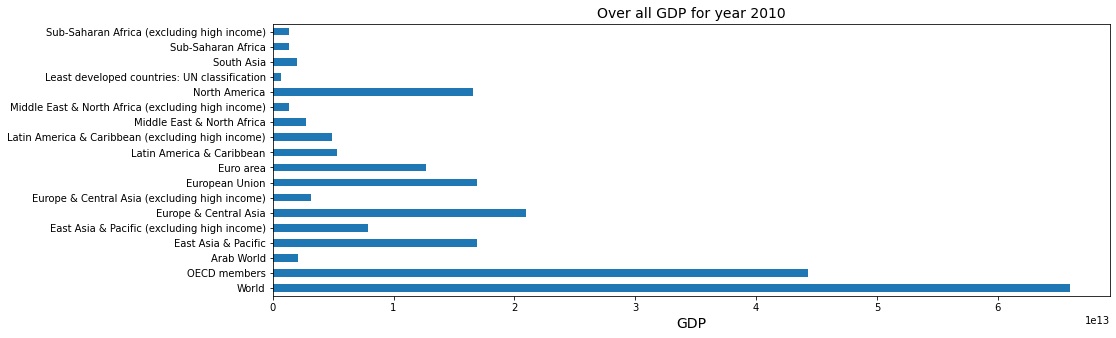

In [15]:
plt.rcParams['figure.figsize']=(15,5)
GDP_current_df['2010'].transpose().plot(kind='barh')
plt.title('Over all GDP for year 2010',fontsize=14)
plt.xlabel('GDP',fontsize=14)
plt.ylabel('',fontsize=14)
plt.show()

#**Observation:-**

*  OECD members have the highest share og global GDP share

*  North America, europe and asia pacific have the highest global GDP share as geographical regions.

*  Sub-Saharan Africa and south asia having the least global GDP share as geographical regions.



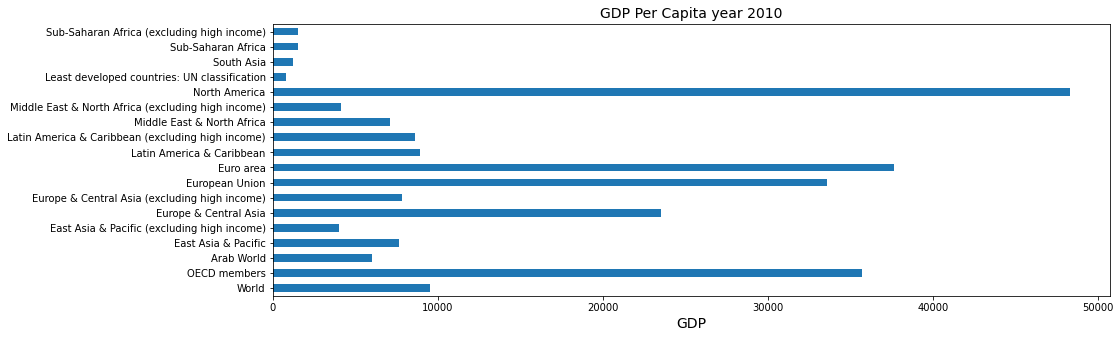

In [16]:
plt.rcParams['figure.figsize']=(15,5)
GDP_per_capita_df['2010'].transpose().plot(kind='barh')
plt.title('GDP Per Capita year 2010',fontsize=14)
plt.xlabel('GDP',fontsize=14)
plt.ylabel('',fontsize=14)
plt.show()

#**Obervation:-**

*  North America have the highest per capita GDP , more than 4.5 times of the world average.

*  Euro area have the seconf highest per capita GDP , close to 4 times of world average.

*  Sub-Saharan Africa and south asia have per capita GDP less than 2000 USD , which is considered exyremely low.

**World map**

In [17]:
edu_df=pd.read_csv(path3)

In [18]:
# selecting indicator to do ananlysis on
govt_edu_df = edu_df[edu_df['Indicator Code']=='SE.XPD.TOTL.GD.ZS']        #% of GDP spending
# govt_edu_df = edu_df[edu_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']          #pupil to student ratio

In [19]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations = govt_edu_df['Country Code'],
    z = govt_edu_df ["2008"],
    text = govt_edu_df ['Country Name'],
    colorscale = 'Teal',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Economy<br>Class ',
))
fig.update_layout(
    title_text='Government expenditure on education as % of GDP (%)',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text = '',
        showarrow = False
    )]
)

fig.show()

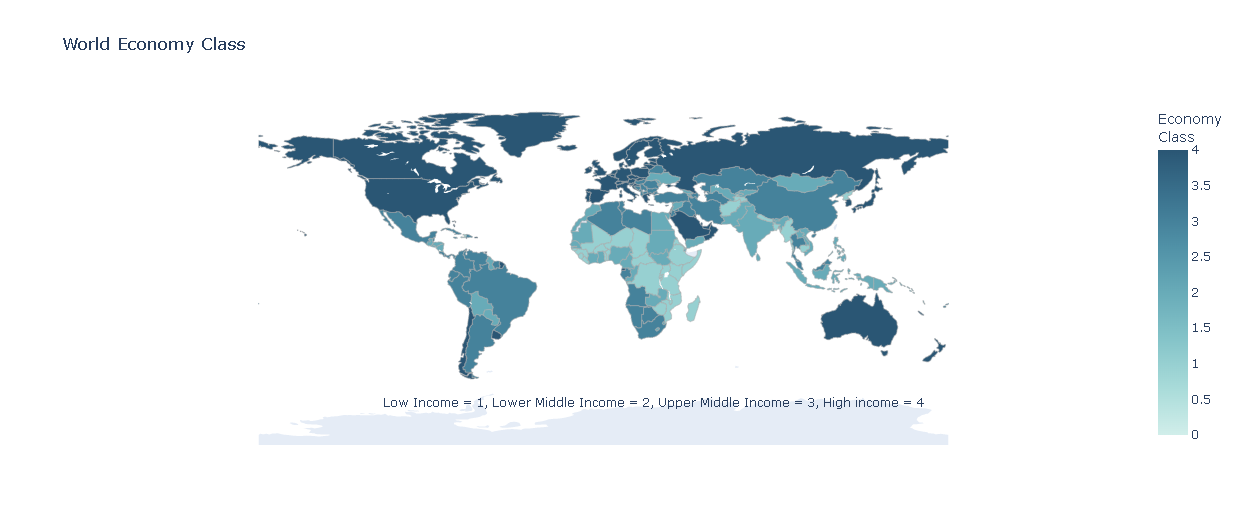

**GDP Share**

In [20]:
#Creating dataframe for the indicator code NY.GDP.MKTP.CD 
GDP_Share =Income_df[Income_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_Share.loc[['High income', 'Middle income', 'Low income', 'Lower middle income',],['2015']]
name = ['High income', 'Middle income', 'Low income', 'Lower middle income',]
quantity=[4.757751e+13,2.679605e+13,4.023901e+11,6.017050e+12]

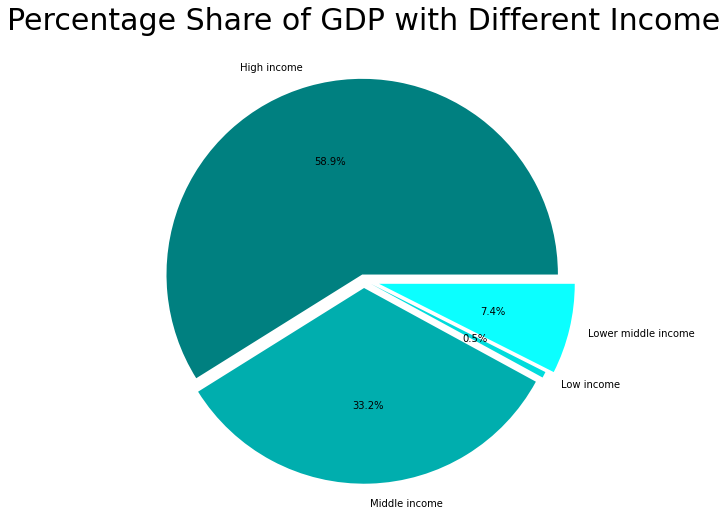

In [21]:
#Ploting the percentage of share in pie chart
fig = plt.figure(figsize =(12,9))
plt.pie(quantity,labels=name,autopct='%0.1f%%', explode = [0.03,0.04,0.04,0.08],colors = ['#008080','#00AEAE', '#00DCDC','#0BFFFF'])
plt.title('Percentage Share of GDP with Different Income', fontsize = 30)
plt.show()

#Observation :-


---


*  From the above pie chart its very clear that high income countries despite being less in numbers(1/4th) controls roughly 58.9% of the worlds GDP.

*  Low income countries despite being 1/3rd in numbers controls only about 0.5% of the Global GDP. Which tells alot about the status of education in these countries.

*  Middle income countries have a 33% shsre in world GDP.

*****Population growth data from main data*****




In [22]:
population_growth =Income_df[Income_df['Indicator Code']=='SP.POP.GROW']


In [23]:
population_growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
graph_1=population_growth.transpose()

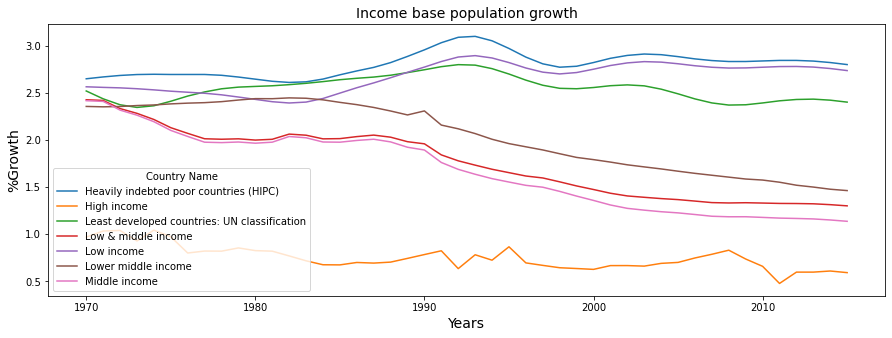

In [25]:
plt.rcParams['figure.figsize']=(15,5)
graph_1.plot()
plt.title('Income base population growth',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('%Growth',fontsize=14)
plt.show()

#**Observation**
* The population growth rate for high income group has been in a narrow range of 0.5% to 1% .

* Lower income groups saw a increase of 0.5 % from 2.5% to 3% till 1990s after that the trend gets reverted.

* Middle income group saw an steady decline from 2.5% in 1970 to below 1.5% in the year 2010.

 

Global Mortality Rate

In [26]:
mortality_rate =Income_df[Income_df['Indicator Code']=='SH.DYN.MORT']

In [27]:
mortality_rate.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
mortality_rate = mortality_rate.transpose()

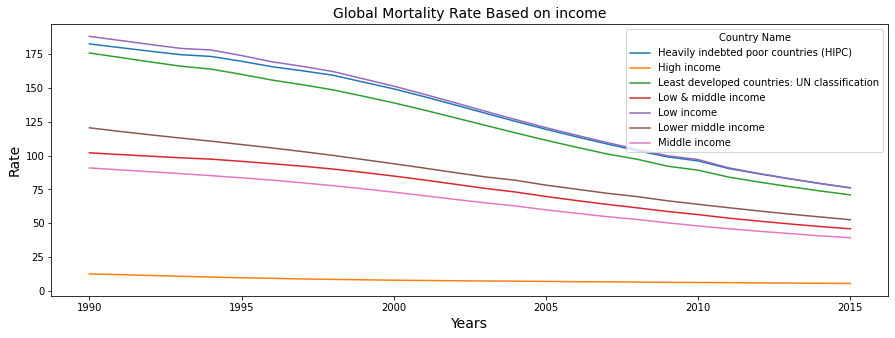

In [29]:
plt.rcParams['figure.figsize']=(15,5)
mortality_rate.plot()
plt.title('Global Mortality Rate Based on income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Rate',fontsize=14)
plt.show()

#**Observation:-**

*  The overall Global mortality rate is steadly declining , which is a good sign.

*  High income countries always had a low mortality rate , due to their good medical facilities and education and awareness level.


Pupil to teacher ratio

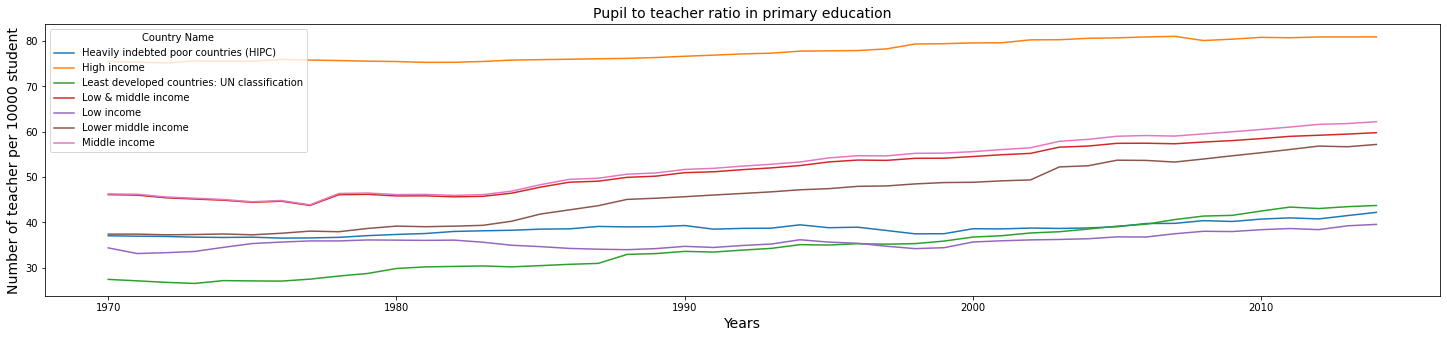

In [30]:
no_primary_enrollment =Income_df[Income_df['Indicator Code']=='SE.PRM.TCHR.FE.ZS']
graph_4b=no_primary_enrollment.transpose()
graph_4b.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_4b.dropna(inplace=True)
plt.rcParams['figure.figsize']=(25,5)
graph_4b.plot()
plt.title('Pupil to teacher ratio in primary education',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Number of teacher per 10000 student',fontsize=14)
plt.show()

##**Observation:-**

1.   The number of teacher are inreasing after 1990 over all the income group. 
2.   With the increase in GDP, per capita income and awareness towards education, the teacher to pupil ration is increasing in lower and middle income as well.
3.A healthy number for the teacher to puple 



---



---



Unemployment

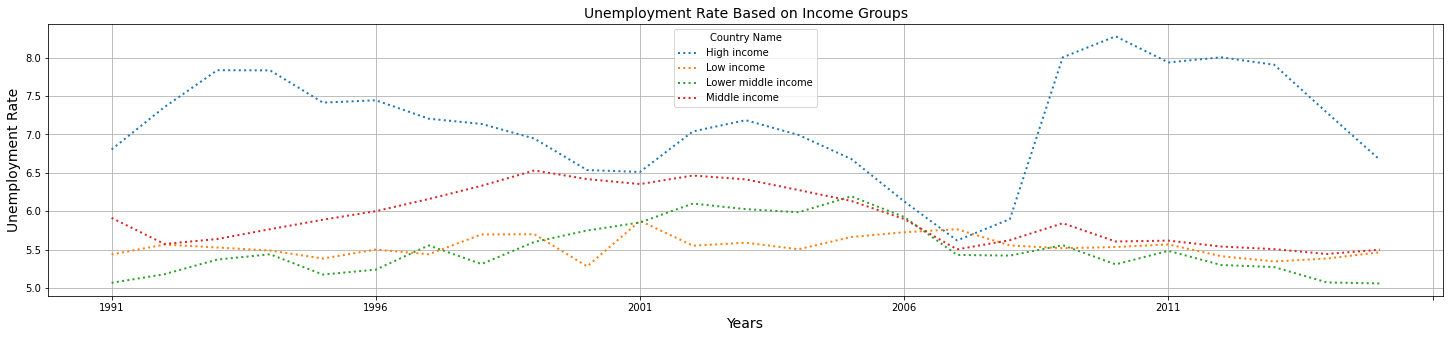

In [31]:
Unemployment =Income_df[Income_df['Indicator Code']=='SL.UEM.TOTL.ZS']
graph_5=Unemployment.transpose()
graph_5.drop(['Indicator Name','Indicator Code'],axis=0,inplace=True)
graph_5.drop(['Heavily indebted poor countries (HIPC)', 'Least developed countries: UN classification','Low & middle income'], axis=1,inplace=True)
graph_5.dropna(inplace=True)
plt.rcParams['figure.figsize']=(25,5)
graph_5.plot(linestyle=":",linewidth=2)
plt.grid(True)
plt.title('Unemployment Rate Based on Income Groups',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('Unemployment Rate',fontsize=14)
plt.show()

#**Observation:-**

*  Low as well as lower middle income countires have a large population working in agriculural sector , which is seasonal. Due to lack of proper data collection infrastructure these people are never counted as unemployed even though they are.

*  Middle income countries have a combination of labour intensive industries both seasonal and non seasonal with low pay. Combined with a lack of proper data collection infrastructure the available data does not show a true picture.

*  High income countries have a proper data collection infrastructe .These unemployment data show a clear ground reality. We can clearly see after the 2007 global market crash unemployment rate sky rocket, and takes almost 7 years to come down . 

#**PISA Learning Data**

In [32]:
# learnning outcome mean peformance on reading scale
Pisa1=new_data[['Country Name','Indicator Code','2015']]
Pisa2=Pisa1[Pisa1['Indicator Code']=='LO.PISA.REA'].set_index(['Country Name'])
Pisa3=Pisa2.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Pisa3.drop(['Indicator Code'],axis=1,inplace=True)
print(Pisa3)


                    2015
Country Name            
India                NaN
Japan           515.9585
United States   496.9351
Germany         509.1041
United Kingdom  497.9719
Canada          526.6678
France          499.3061


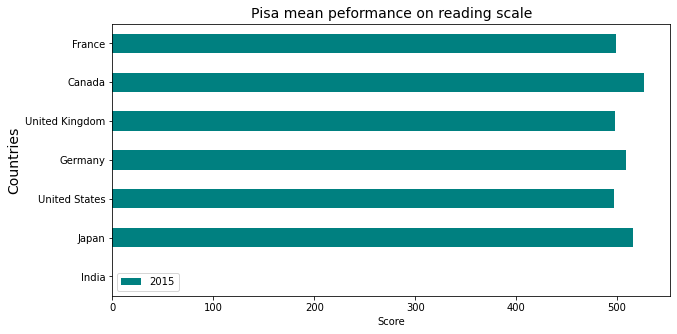

In [33]:
# plot bar chart
plt.rcParams['figure.figsize']=(10,5)
Pisa3.plot(kind='barh',color= "Teal")
plt.title('Pisa mean peformance on reading scale',fontsize=14)
plt.xlabel('Score',fontsize=10)
plt.ylabel('Countries',fontsize=14)
plt.show()

#**Observation:-**

*  As we have alredy concluded from the previous graphs , these countries put a high priority towards education, It shows in their PISA reading scale.

*  All the big economies of the world have a high over all score in the range 400 - 500 for the year 2015



In [34]:
# learnning outcome mean peformance on mathematic scale
Pisa1M=new_data[['Country Name','Indicator Code','2015']]
Pisa2M=Pisa1M[Pisa1M['Indicator Code']=='LO.PISA.MAT'].set_index(['Country Name'])
Pisa3M=Pisa2M.loc[['India','Japan','United States','Germany','United Kingdom','Canada','France']]
Pisa3M.drop(['Indicator Code'],axis=1,inplace=True)
print(Pisa3M)


                    2015
Country Name            
India                NaN
Japan           532.4399
United States   469.6285
Germany         505.9713
United Kingdom  492.4785
Canada          515.6474
France          492.9204


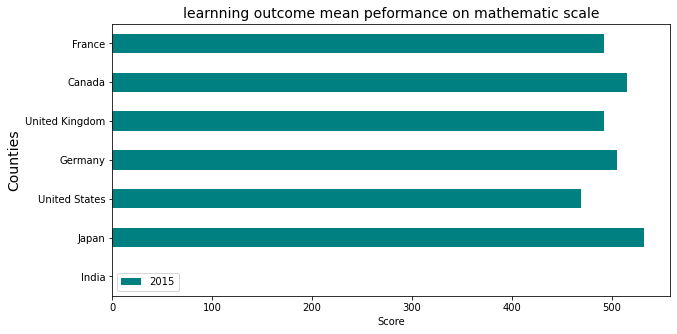

In [35]:
# plot bar chart
plt.rcParams['figure.figsize']=(10,5)
Pisa3M.plot(kind='barh',color= "Teal")
plt.title('learnning outcome mean peformance on mathematic scale',fontsize=14)
plt.xlabel('Score',fontsize=10)
plt.ylabel('Counties',fontsize=14)
plt.show()

#**Observation:-**

*  As we have alredy concluded from the previous graphs , these countries put a high priority towards education, It shows in their PISA mathematic scale.

*  All the big economies of the world have a high over all score in the range 400 - 500 for the year 2015

# **Analysis Summry**
##**1. Analysis on income group**
*  From our previous analysis we came to know that Higher income countries constitute only about 1/4 in numbers and still controls 60% of world GDP. 

*  Despite making ⅓  in numbers, lower income countries have only about 0.5% of Global GDP share.  

*  This parity shows on multiple indicators such as population growth rate, Female enrolment in Tertiary Education, Teacher to Pupil Ratio, Mortality Rate.

*  On one hand the overall education level of high income countries has always been good, But over the years, especially over the last two decades the female enrolment  in tertiary education and labor force has increased exponentially.

*  On the other hand, lower income countries are still struggling for  any  significant improvement  in the education sector.
Middle income countries have shown consistent improvement in overall education, Be it Teacher to pupil ratio, percentage of population getting access to primary education, Female participation in all levels of education.

##**2.  Analysis by  Region**
*  From our analysis on the global GDP with respect to income groups on the world map  we can clearly see that high income countries are concentrated in Europe and North america.  

*  Most of the  low income Countries  are in Africa with few exceptions in the Middle  East(Afghanistan).

*  Middle income countries are spread  throughout the world with high concentration in Asia, with representation in Europe, Latin America,  Africa .

*  From all this analysis we are stating the obvious, Europe and North America being the center of education in the world due their world renowned institutes attracting talent from all across the Globe.

*  Whereas sub saharan Africa is constantly struggling to feed their population. With not enough resources to allocate towards education these countries have to rely on organizations such as World Bank and its sister organizations for basic necessities like food and education.

*  This trend also shows in the mortality rate being high in africa and low in europe and north america, and lack of education and awareness contributes towards high population growth in africa and relatively low population growth rate in europe and north america.

*  With some analysts stating that this century will be Asia’s century.Most of the emerging economies are from Asia, these emerging economies countries are spending a large percentage of their GDP towards educating their children and reeducating their labor force. 
 
##**3.  Analysis on Big Economies of the world**
*  The analysis on the big economies of the world over the last three decades shows the clear trend of   high government expenditure on education.

*  The analysis of labor force on these big economies shows a well educated(trained) labor force. India has the second largest trained labor force.

*  Even countries like Japan with a small aging population have a relatively large amount of educated labor force.
PISA reading scores and PISA mathematics scores show a clear picture of how the spending on education has been fruitful for these countries.

*  With the trend of technology integration in social life and a possibility of Metaverse, it is expected to see a further increase in education spending for these countries.      

#**Suggestions:-**

*   Awareness programmes should be incorporated in order to have a 
Sustainable population growth so that proper resources and facilities can be provided to everyone.

*   There should be more spending on education as a percentage of GDP by the respective governments.

*   As we have analyzed that the skilled and educated workforce can contribute better in the development of the nation, we must be focused towards education of children and re-education of the labor force.

*   In order to increase the quality of education we should follow the norms suggested by the world bank for Teacher to Pupil ratio. Better data collection helps in better data analysis and providing solutions to ongoing problems and upcoming problems, so we should try to collect the proper data.
